In [1]:
%cd ..
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

/home/anthony/workspace/yt-data


In [2]:
# from thumbs.experiments.pokemon import PokemonExperiment
from thumbs.experiments.pokemon_overfit import PokemonExperiment


exp = PokemonExperiment()
mparams = exp.get_mutable_params()
m = exp.get_model(mparams[0]).build()
# load_weights(m.gan, exp.get_params().weight_path)

/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-07-12 21:10:15.253760: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                                             Output Shape                                                                    Param #                       
 diff_augment_layer (DiffAugmentLayer)                                                    (None, 128, 128, 3)                                                             0                             
                                                                                                                                                                                                        
 conv2d (Conv2D)                                                                          (None, 64, 64, 128)                                                             614

Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 820 total files
Found 819 jpgs


  0%|          | 0/819 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

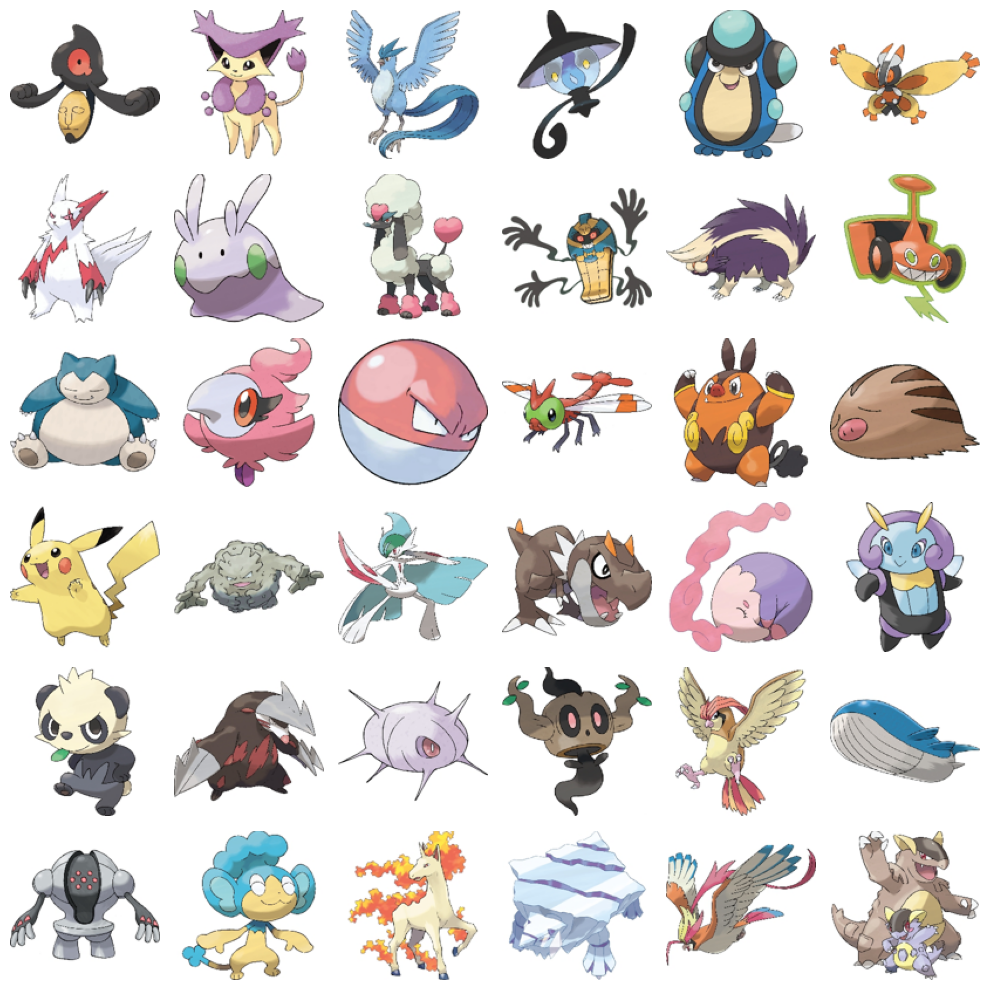

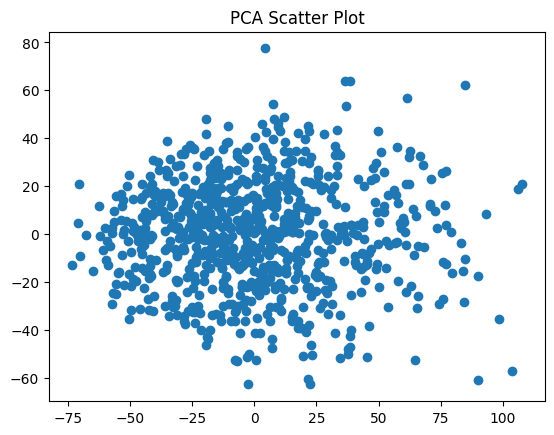

In [3]:
data = exp.get_data()

In [4]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices(data)

In [5]:
prepared = exp.prepare_data(dataset, exp.get_mutable_params()[0])

tf.Tensor(
[[ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          0.9843137 ]
 [ 1.          1.          1.        ]
 [ 1.          0.99215686  1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.          1.          1.        ]
 [ 1.         

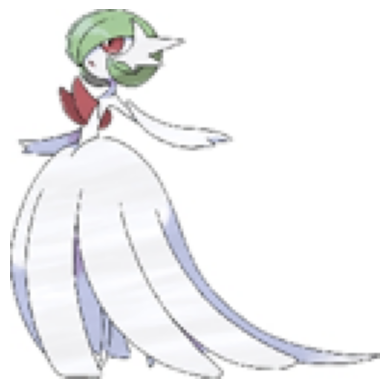

In [10]:

from thumbs.viz import show_samples, visualize_preprocessed_image

item, = prepared.__iter__().__next__()

print(item[0])
visualize_preprocessed_image(item.numpy())

In [41]:
exp.lookup(['bug'])

<tf.Tensor: shape=(19,), dtype=float32, numpy=
array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>